In [1]:
# Import Dependencies

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import preprocessing
import xgboost as xg

In [2]:
# Read file
df = pd.read_csv("./data.csv")
df.head()

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT,VORJAHRESWERT,VERAEND_VORMONAT_PROZENT,VERAEND_VORJAHRESMONAT_PROZENT,ZWOELF_MONATE_MITTELWERT
0,Alkoholunfälle,insgesamt,2021,202101,NaN,28.0,NaN,NaN,NaN
1,Alkoholunfälle,insgesamt,2021,202102,NaN,40.0,NaN,NaN,NaN
2,Alkoholunfälle,insgesamt,2021,202103,NaN,27.0,NaN,NaN,NaN
3,Alkoholunfälle,insgesamt,2021,202104,NaN,26.0,NaN,NaN,NaN
4,Alkoholunfälle,insgesamt,2021,202105,NaN,40.0,NaN,NaN,NaN


In [3]:
df.shape

(1995, 9)

In [4]:
# Selection of columns
df = df.iloc[:,:5]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1995 entries, 0 to 1994
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MONATSZAHL   1995 non-null   object 
 1   AUSPRAEGUNG  1995 non-null   object 
 2   JAHR         1995 non-null   int64  
 3   MONAT        1995 non-null   object 
 4   WERT         1911 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 78.1+ KB


In [6]:
# Checking NaN values
df["WERT"].isna().value_counts()

False    1911
True       84
Name: WERT, dtype: int64

In [7]:
df["MONAT"].unique()

array(['202101', '202102', '202103', '202104', '202105', '202106',
       '202107', '202108', '202109', '202110', '202111', '202112',
       'Summe', '202001', '202002', '202003', '202004', '202005',
       '202006', '202007', '202008', '202009', '202010', '202011',
       '202012', '201901', '201902', '201903', '201904', '201905',
       '201906', '201907', '201908', '201909', '201910', '201911',
       '201912', '201801', '201802', '201803', '201804', '201805',
       '201806', '201807', '201808', '201809', '201810', '201811',
       '201812', '201701', '201702', '201703', '201704', '201705',
       '201706', '201707', '201708', '201709', '201710', '201711',
       '201712', '201601', '201602', '201603', '201604', '201605',
       '201606', '201607', '201608', '201609', '201610', '201611',
       '201612', '201501', '201502', '201503', '201504', '201505',
       '201506', '201507', '201508', '201509', '201510', '201511',
       '201512', '201401', '201402', '201403', '201404', '20140

In [8]:
# Removing Summe from MONAT Column 
df = df[~df["MONAT"].isin(["Summe"])]

In [9]:
df["MONATSZAHL"].unique()

array(['Alkoholunfälle', 'Fluchtunfälle', 'Verkehrsunfälle'], dtype=object)

In [10]:
# Grouping by category and summing up accidents

cat1 = df.groupby(["MONATSZAHL"], as_index = False)["WERT"].sum()
cat1

,MONATSZAHL,WERT
0,Alkoholunfälle,16242.0
1,Fluchtunfälle,232928.0
2,Verkehrsunfälle,1127266.0


In [11]:
# Converting string variable to int. LabelEncoder could have been used here
le = preprocessing.LabelEncoder()
le.fit(df["MONATSZAHL"])
df["MONATSZAHL"] = le.transform(df["MONATSZAHL"])

le1 = preprocessing.LabelEncoder()
le1.fit(df["AUSPRAEGUNG"])
df["AUSPRAEGUNG"] = le1.transform(df["AUSPRAEGUNG"])

In [12]:
# Extracting only Month value
df["MONAT"] = df["MONAT"].apply(lambda x : x[4:])
# Dropping Na
df.dropna(inplace = True)

# X,y values
X = df.iloc[:,:4].values
y = df.iloc[:,-1].values

### Visualization

In [13]:
# Visualization 
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import matplotlib.gridspec as gridspec 
import matplotlib.patheffects as path_effects

from highlight_text import htext, fig_text, HighlightText, ax_text

# Image
from PIL import Image
import requests
from io import BytesIO

In [14]:
# Visualization variables initialization

background = "#404040"
text_color = "w"

mpl.rcParams['xtick.color'] = text_color
mpl.rcParams['ytick.color'] = text_color
mpl.rcParams['xtick.labelsize'] = 10
mpl.rcParams['ytick.labelsize'] = 10

filler = "grey"
primary ="red"

title_font = "Kanit"
body_font = "Heebo"

#### Using my custom plot 

C:\Users\Harry\anaconda3\lib\site-packages\ipykernel_launcher.py:48: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


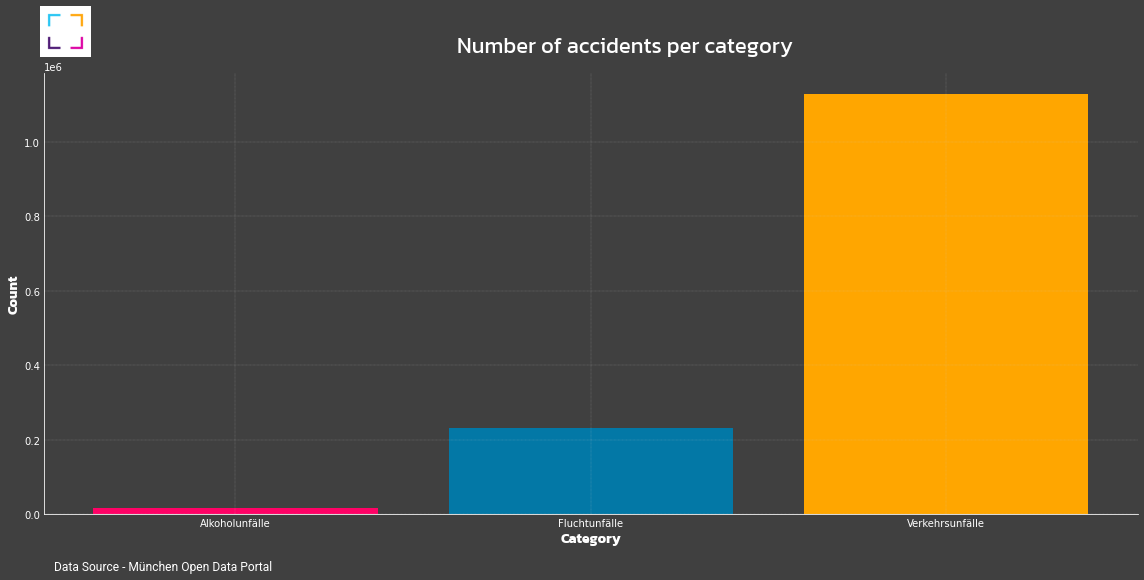

In [15]:
# creating figure and axes
fig, ax = plt.subplots(figsize=(16,7))
fig.set_facecolor(background)
ax.patch.set_facecolor(background)

# adding a grid with zorder and style
ax.grid(ls="dotted",lw="0.3",color="lightgrey", zorder= 1, visible = True)

# getting our data to plot
x = cat1["MONATSZAHL"].values
y = cat1["WERT"].values
colors = ["#FF0266", "#0378a6", "#ffa600"]

ax.bar(x,y, color = colors)

# Title 
fig.text(0.40,1,"Number of accidents per category", fontweight="regular", fontsize=22,fontfamily=title_font, color=text_color)

# adding x and y labels
ax.set_xlabel("Category", fontfamily=title_font, fontweight="bold", fontsize=14, color=text_color)
ax.set_ylabel("Count", fontfamily=title_font, fontweight="bold", fontsize= 14, color=text_color)

# Spine and Pips
ax.tick_params(axis="both", length=0)


spines = ["top", "right", "bottom", "left"]
for spine in spines:
    if spine in ["top", "right"]:
        ax.spines[spine].set_visible(False)
    else:
        ax.spines[spine].set_color(text_color)

        
# For badge: Adding new axes
ax2 = fig.add_axes([0.01,0.99,0.1,0.1])
ax2.axis("off")

url = "https://scontent.fdel1-2.fna.fbcdn.net/v/t1.6435-9/37367175_512937642470201_6481847291731771392_n.png?_nc_cat=101&ccb=1-5&_nc_sid=09cbfe&_nc_ohc=-VCH9ZW9gk8AX-Q1JRk&_nc_ht=scontent.fdel1-2.fna&oh=00_AT89bp-eFQ9c09fDSnW69vlamUm5KkCkFA4Po0EPnkZtXg&oe=6236AF3E"
response = requests.get(url)
img = Image.open(BytesIO(response.content))
ax2.imshow(img)     

# Adding Credits
fig.text(0.05, -0.028, "Data Source - München Open Data Portal", fontstyle="italic", fontsize=12, 
         fontfamily=body_font, color=text_color)

plt.tight_layout()


fig.savefig("./Accidents_per_category.jpg", dpi=None)

plt.show()

### Conclusion

1. Highest number of accidents are due to Verkehrsunfälle	1127266
2. Lowest number of accidents are due to Alkoholunfälle	  16242

### Model

In [16]:
df

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT
13,0,1,2020,01,28.0
14,0,1,2020,02,40.0
15,0,1,2020,03,27.0
16,0,1,2020,04,26.0
17,0,1,2020,05,40.0
...,...,...,...,...,...
1990,2,0,2000,08,647.0
1991,2,0,2000,09,675.0
1992,2,0,2000,10,615.0
1993,2,0,2000,11,578.0


In [17]:
X = df.iloc[:,:4].values
y = df.iloc[:,-1].values

In [18]:
# Splitting data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, shuffle = True)

In [19]:
# Simple Regression as base model
reg = LinearRegression().fit(X_train, y_train)

# Prediction 
y_pred = reg.predict(X_test)

In [20]:
# R2 Score
r2_score(y_test, y_pred)

0.2569908470836221

In [21]:
# Instantiation of XGB Regression Model
xgb_r = xg.XGBRegressor(n_estimators = 10, seed = 123)
  
# Fitting the model
xgb_r.fit(X_train, y_train)
  
# Predict the model
pred = xgb_r.predict(X_test)

In [22]:
r2_score(y_test, pred)

0.9888224283975608

### Conclusion

1. LinearRegression has R2Score = 0.25
2. Using ensemble learning algorithm XGBoost R2Score = 0.98

Hence choosing XGBoost